In [137]:
import os

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Math
from sklearn.metrics.pairwise import cosine_similarity

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [106]:
def normalize_matrix(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def denormalize_matrix(data, original_data):
    return (data + np.min(original_data)) / (np.max(original_data) - np.min(original_data))

Movie,Ace Ventura,Lord of the Rings,Planet Earth,The Fault in Our Stars
User,,,,
David,4.000,3.000,NaN,4.000
Josh,5.000,4.000,5.000,2.000
Jude,NaN,NaN,1.000,4.000
Kate,NaN,5.000,4.000,2.000
Peter,5.000,1.000,5.000,NaN


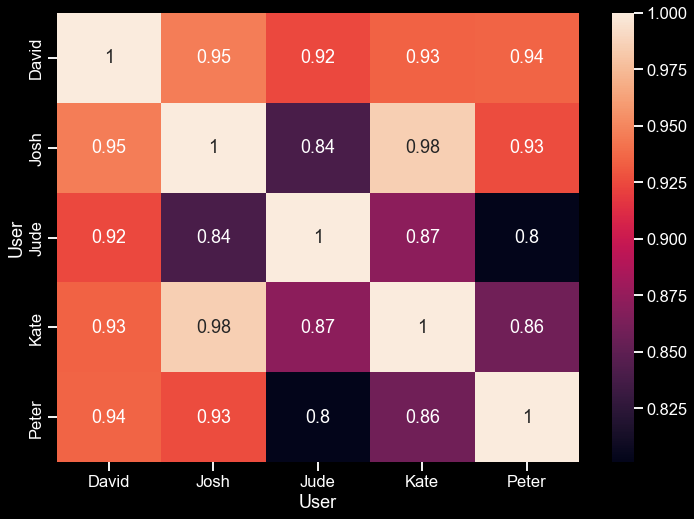

In [140]:
df = pd.read_csv('movie_test_matrix_2.csv')
df = df.pivot(columns="Movie", index="User", values="Rating")
df_imputed = df.fillna(df.mean(axis=0))
similarity_matrix = cosine_similarity(df_imputed.values)

pd.options.display.float_format = '{:.3f}'.format
sim_df = pd.DataFrame(similarity_matrix, columns=df.index, index=df.index)

display(df)
heatmap = sns.heatmap(sim_df, annot=True)

In [131]:
df.index

Index(['David', 'Josh', 'Jude', 'Kate', 'Peter'], dtype='object', name='User')

In [117]:
user_idx = 2
user_id = df.iloc[user_idx].name

similarity_scores = list(enumerate(similarity_matrix[user_idx]))
unrated_movies = df.iloc[user_idx][df.iloc[user_idx].isna()].index

weights = [x[1] for x in similarity_scores]
movie_ratings = (df[unrated_movies].T * weights).T
movie_ratings = movie_ratings.iloc[[x[0] for x in similarity_scores]].mean()

nr_ratings = 2
recommendations = movie_ratings.sort_values(ascending=False)[:nr_ratings]

print(user_id)
display(recommendations)

Jude


Movie
Ace Ventura          3.966235
Lord of the Rings    2.822213
dtype: float64

In [116]:
df

Movie,Ace Ventura,Lord of the Rings,Planet Earth,The Fault in Our Stars
User,,,,
David,4.0,3.0,NaN,4.0
Josh,5.0,4.0,5.0,2.0
Jude,NaN,NaN,1.0,4.0
Kate,NaN,5.0,4.0,2.0
Peter,5.0,1.0,5.0,NaN
